####100개 데이터셋 2진분류
-KNN
-품종분류
-학습용 테스트용 데이터셋 분리
-테스트용 데이터셋으로 검증

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
DATA_FILE = '../data/iris.csv'

In [9]:
# 행 : Bream, Smelt 컬럼 : Species, Weight, Height => 0,1,2
irisDF=pd.read_csv(DATA_FILE)
irisDF=irisDF.iloc[:100]
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [10]:
irisDF.reset_index(drop=True, inplace=True)
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [11]:
### [2] 피처와 컬럼의 관계, 피쳐와 피쳐의 관계
### [2-1] 피쳐와 타겟의 관계 ==> 어느정도의 연관성이 있는지 확인
### -> 상관계수 확인
### => object 타입의 품종을 int로 변환한 컬럼 추가 Species_Code
### ndarray => list 형변환 tolist

names = irisDF['variety'].unique().tolist()
new_cols=irisDF.loc[:,'variety'].replace({'Setosa':0, 'Versicolor':1})  
irisDF['FCode'] = new_cols
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety,FCode
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor,1
96,5.7,2.9,4.2,1.3,Versicolor,1
97,6.2,2.9,4.3,1.3,Versicolor,1
98,5.1,2.5,3.0,1.1,Versicolor,1


[2] 피쳐와 타겟분리

In [12]:
irisDF.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width,FCode
sepal.length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal.width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal.length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal.width,0.789608,-0.570883,0.979322,1.000000,0.960307
FCode,0.728290,-0.690684,0.969990,0.960307,1.000000


In [13]:
features = irisDF[['petal.length','petal.width']]
target = irisDF['FCode']
print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (100, 2), 2D
target => (100,), 1D


In [14]:
irisDF.index

RangeIndex(start=0, stop=100, step=1)

In [15]:
from sklearn.model_selection import train_test_split

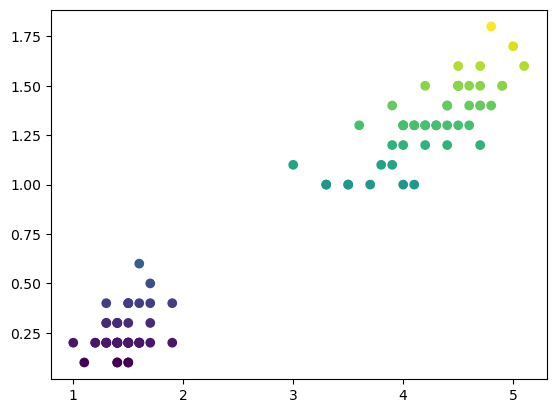

In [16]:
plt.scatter(irisDF['petal.length'],irisDF['petal.width'],c=irisDF['petal.width'])
plt.show()

In [17]:
# train : test = 80:20 ===> test_size = 0.2 or train_size=0.8  
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려    
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=10)

In [18]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D')
print(f'y_train: {y_train.shape}, {y_train.ndim}D')

print(f'X_test: {X_test.shape}, {X_test.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

X_train: (80, 2), 2D
y_train: (80,), 1D
X_test: (20, 2), 2D
y_test: (20,), 1D


In [19]:
y_train.value_counts(), y_train.shape

(FCode
 1    40
 0    40
 Name: count, dtype: int64,
 (80,))

In [20]:
# target 0(Setosa), 1(Versicolor)의 비율 
y_train.value_counts()[0]/y_train.shape[0],y_train.value_counts()[1]/y_train.shape[0]

(0.5, 0.5)

In [21]:
y_test.value_counts()[0]/y_test.shape[0],y_test.value_counts()[1]/y_test.shape[0]

(0.5, 0.5)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [23]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
model.classes_, model.feature_names_in_, model.n_samples_fit_


(array([0, 1], dtype=int64),
 array(['petal.length', 'petal.width'], dtype=object),
 80)

In [25]:
model.score(X_test, y_test)

1.0